In [2]:
import pandas as pd

# URL example – change to a specific Drive Finder or stats page
url = 'https://www.bcftoys.com/2024-ppd/'

# Try reading tables directly from the URL
tables = pd.read_html(url)

# Preview
print(f"Found {len(tables)} tables")
df = tables[0]
df.to_csv('bcf_drive_data.csv', index=False)

Found 1 tables


In [3]:

drive_data = pd.read_csv('../bcf_drive_data.csv', header=[0, 2])

drive_data = drive_data.drop(drive_data.index[[16, 33, 50, 67, 84, 101, 118, 135]])
drive_data = drive_data.drop(drive_data.columns[[0, 5, 7, 9, 11, 13, 14, 16, 18, 20, 22]], axis=1)
# drive_data = drive_data.dropna(how='any')
# print(drive_data.isnull().sum())  # Check remaining NaNs
# print(drive_data.shape)  # Rows and columns

drive_data

,1,2,3,4,6,8,10,12,15,17,19,21
,Team,Rec,FBS,NPD,OPD,OLD,OMD,OSD,DPD,DLD,DMD,DSD
0,Ohio State,14-2,14-2,2.29,3.55,2.47,3.54,4.79,1.26,.56,1.17,3.00
1,Army,12-2,11-2,1.94,3.60,2.23,3.60,5.05,1.67,-.14,1.58,3.93
2,Indiana,11-2,10-2,1.83,3.50,3.14,3.27,4.25,1.66,1.71,1.33,3.62
3,Ole Miss,10-3,9-3,1.78,2.98,2.55,2.93,3.72,1.20,1.08,1.18,1.78
4,Notre Dame,14-2,14-2,1.75,3.07,3.20,2.76,3.80,1.32,.49,1.41,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Middle Tennessee,3-9,2-9,-1.79,1.57,.52,1.76,2.67,3.36,2.07,3.53,4.74
146,Tulsa,3-9,2-9,-1.91,1.21,1.00,1.19,1.55,3.12,2.73,2.67,4.68
147,Southern Mississippi,1-11,0-11,-2.45,1.10,.73,1.04,2.40,3.55,2.28,3.63,4.14


Random Forest R² score: 0.94


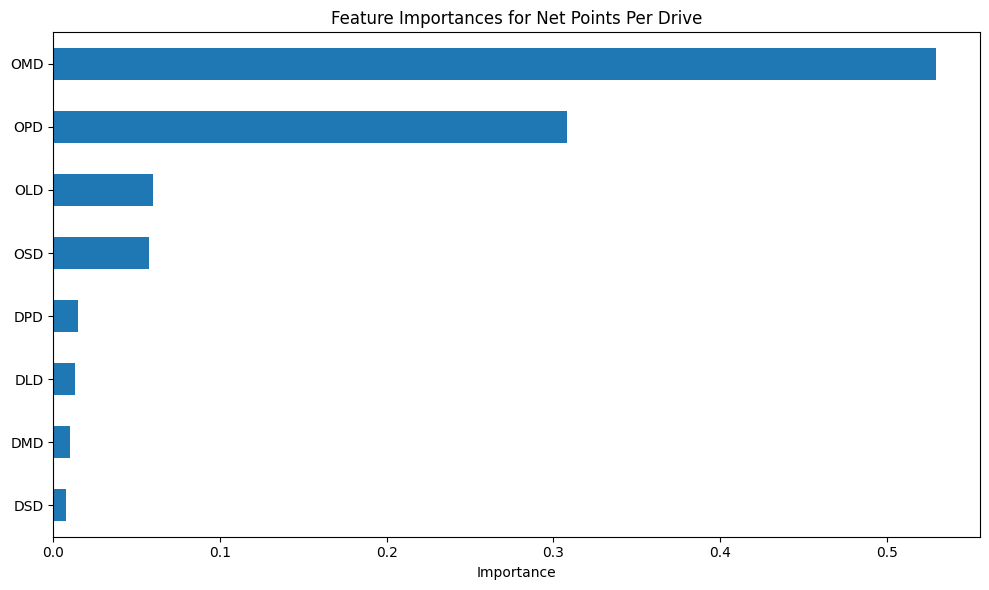

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# AI Cleaning/ restructure of data (Record, FBS_Record)
df = pd.read_csv('../python_data/final_dd_clean.csv')

# Drop non-modeling columns
columns_to_drop = ['Record', 'FBS_Record']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Select features and target
features = ["OPD", "DPD", "OLD", "DLD", "OMD", "DMD", "OSD", "DSD"]
target = "NPD"

# Drop missing values
df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

# Split and train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R² score: {r2:.2f}")

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Feature Importances for Net Points Per Drive")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()